**Qingbo Liu**

Spring 2020

CS 251B: Data Analysis and Visualization

Project 3: Linear Regression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression 

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

- In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
    - `np.linalg.inv`
    - `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
    - `np.linalg.norm`

## Task 1: Run a linear regression

In this task, you will implement linear regression using the built-in SciPy least-squares solver, then analyze and plot the results on the Iris dataset. 

### 1a) Import Iris data

**TODO:**
- In the below cell, load in the Iris dataset into a `Data` object.
- Print out the object (only showing the first few data samples).
- Create an `LinearRegression` object called `lin_reg` based on the `Data` object that you just created.

In [15]:
iris_fp = 'data/iris.csv'
iris_data = data.Data(iris_fp)

print(iris_data)

lin_reg = linear_regression.LinearRegression(iris_data)

Headers
sepal_length sepal_width petal_length petal_width species 
Types:
numeric numeric numeric numeric numeric 
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


Your code should print something that looks like this:

    -------------------------------
    data/iris.csv (150x5)
    Headers:
    sepal_length	sepal_width	petal_length	petal_width	species
    Types:
    numeric	numeric	numeric	numeric	numeric
    -------------------------------
    Showing first 5/150 rows.
    5.1	3.5	1.4	0.2	0.0
    4.9	3.0	1.4	0.2	0.0
    4.7	3.2	1.3	0.2	0.0
    4.6	3.1	1.5	0.2	0.0
    5.0	3.6	1.4	0.2	0.0

### 1b) Use SciPy's built-in least squares solver to perform linear regression

Implement the following methods that are necessary to perform and analyze a linear regression.

- `linear_regression_scipy`: Uses the built-in least squares solver in the `scipy` module to perform linear regression. **Run test code below.**
- `predict`: Use fitted linear regression model coefficients to make predictions based on the data. **Run test code below.**
- `r_squared`: Quality of fit metric for linear regression.
- `compute_residuals`: Compute the difference between the regression model predictions and the actual dependent variable values (residuals).
- `linear_regression`: This is the method that brings together everything you've implemented so far and is the "front-facing" method that you want to call if you want to do a linear regression. The methods you have implemented thus far are "helper methods". **Run test code below.**

**$R^2$ Equation:** $$1 - \frac{E}{S}$$ where $$E = \sum_i \left (y_i - \hat{y}_i \right )^2$$ and $$S =  \sum_i \left (y_i - \bar{y} \right )^2$$ where $y_i$ are the dependent variable values, $\bar{y}_i$ is the mean of the dependent variable values, $\hat{y}_i$ is the y values *predicted* by the regression. 

#### Test `linear_regression_scipy`

In [3]:
np.random.seed(0)
# test data: 10 data samples, 4 dimensional.
test_A = np.random.normal(size=(10, 4))
test_y = np.random.normal(size=(10, 1))
test_c = lin_reg.linear_regression_scipy(test_A, test_y)
print(f'Your regression fit coefficients are\n{np.squeeze(test_c)} and should be\n[ 0.10874  0.58024  0.05166 -0.34    -0.54393]')
print(f'Your regression fit coefficient column vector shape is\n{test_c.shape} and should be\n(5, 1)')

Your regression fit coefficients are
[ 0.10874  0.58024  0.05166 -0.34    -0.54393] and should be
[ 0.10874  0.58024  0.05166 -0.34    -0.54393]
Your regression fit coefficient column vector shape is
(5, 1) and should be
(5, 1)


#### Test `predict`

In [4]:
np.random.seed(0)
# test data: 3 data samples, 4 dimensional.
test_slope = np.random.normal(size=(5, 1))
test_X = np.random.normal(size=(3, 5))
y_pred = lin_reg.predict(test_slope, np.pi, test_X)
print(f'Your model y predictions are\n{np.squeeze(y_pred)} and should be\n[2.18518 5.82409 3.23376]')
print(f'Your model y predictions shape is\n{y_pred.shape} and should be\n(3, 1)')

Your model y predictions are
[2.18518 5.82409 3.23376] and should be
[2.18518 5.82409 3.23376]
Your model y predictions shape is
(3, 1) and should be
(3, 1)


#### Test `linear_regression` method

In [5]:
lin_reg.linear_regression(['sepal_length'], 'petal_width', method='scipy')

# test shapes of instance variables
print(f'Shape of your A data array is\n{lin_reg.A.shape} and should be\n(150, 1)')
print(f'Shape of your y dep var vector is\n{lin_reg.y.shape} and should be\n(150, 1)\n')
print(f"Your independent variables are {lin_reg.ind_vars} and should be ['sepal_length']")
print(f'Your dependent variables are {lin_reg.dep_var} and should be petal_width\n')
print(f'Shape of your slope fits are {lin_reg.slope.shape} and should be (1, 1)')
print(f'Length of your intercept is {lin_reg.intercept.size} and should be 1')
print(f'Length of your R^2 is {lin_reg.R2.size} and should be 1\n')

# Test specific values
print(f'Your slope is {lin_reg.slope} and should be [[0.75292]]')
print(f'Your intercept is {lin_reg.intercept:.2f} and should be -3.20')
print(f'Your R^2 is {lin_reg.R2:.2f} and should be 0.67')
print(f'Your 1st few residuals are\n{lin_reg.residuals[:5].T} and should be\n[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]]')

Shape of your A data array is
(150, 1) and should be
(150, 1)
Shape of your y dep var vector is
(150, 1) and should be
(150, 1)

Your independent variables are ['sepal_length'] and should be ['sepal_length']
Your dependent variables are petal_width and should be petal_width

Shape of your slope fits are (1, 1) and should be (1, 1)
Length of your intercept is 1 and should be 1
Length of your R^2 is 1 and should be 1

Your slope is [[0.75292]] and should be [[0.75292]]
Your intercept is -3.20 and should be -3.20
Your R^2 is 0.67 and should be 0.67
Your 1st few residuals are
[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]] and should be
[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]]


## Task 2: Visualize linear regression

### 2a) Update `scatter` to support visualizing linear regression results

- Implement `scatter` in `linear_regression.py`: Call your `Analysis::scatter` method to make the scatter plot, then handle overlaying the regression line in `LinearRegression::scatter`. **Run test code below.**

#### Test  `scatter` with linear regression

Only run this when you're done implementing all the methods thru `linear_regression`. This should produce:
- A scatter plot with a linear regression line that looks like it makes sense.
- The title should have the linear regression method ("scipy") and the $R^2$ value.

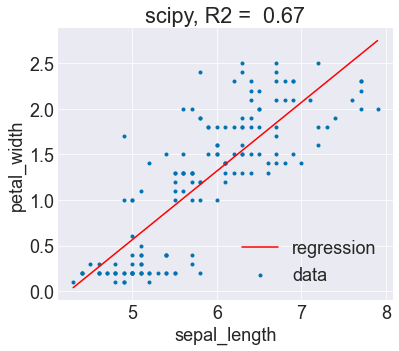

In [6]:
lin_reg.scatter('sepal_length', 'petal_width', 'scipy')
lin_reg.show()

### 2b) Update `pair_plot` to add regression lines to each scatter plot

- In the cell below, load in the `test52` data in a `Data` object.
    - Print the `Data object` (1st few lines only).
    - Create a `linear_regression` object based on the `Data` object.

In [7]:
test52_fp = 'data/testdata52.csv'
test52_data = data.Data(test52_fp)
print(test52_data)

lin_reg = linear_regression.LinearRegression(test52_data)

Headers
D0 D1 D2 D3 D4 
Types:
numeric numeric numeric numeric numeric 
[[-0.3  -0.49  1.35 -1.21  0.46]
 [ 0.73  0.28  1.15 -0.2  -0.22]
 [ 0.48 -0.25 -0.83  0.46  0.35]
 [ 0.33 -0.26  1.53  0.24 -1.01]
 [-0.99 -1.24  0.74 -1.57  1.22]
 [-0.57 -0.56  1.06 -1.24 -0.19]
 [-1.84 -2.23  1.03 -0.98 -0.98]
 [ 0.44  0.13  1.   -0.06 -0.63]
 [ 0.85  0.11 -0.71  1.33 -0.14]
 [-0.54  0.24 -0.44 -1.25  1.39]
 [ 1.66  2.    0.02  0.78  1.83]
 [ 0.74  2.26  1.51  0.81  1.5 ]
 [-0.66  0.34 -1.12  0.25 -2.95]
 [-0.01  0.19  0.59 -0.84  0.42]
 [ 1.25  2.01 -3.21 -1.36  2.12]
 [-0.65  0.34  1.13  0.83 -2.36]
 [ 1.02  1.06 -0.85 -0.87 -0.05]
 [ 0.01  0.47 -0.46 -0.1   0.2 ]
 [ 1.16  1.28 -1.21  1.3  -1.76]
 [-0.37 -1.1  -0.87  2.6   0.49]]


#### Test `pair_plot()`

- Write `pair_plot()` in `linear_regression.py` that calls `Analysis::pair_plot` and extends it  to compute and plot the regression line for each scatter plot (all pairs of variables). **Run test code below.**

Executing the cell below should produce:
- A 5x5 grid of scatter plots.
- (*new*) regression lines in each scatter plot. The title of each subplot should have the $R^2$ value.
- Only 1st column has y axis labels.
- Only last column has x axis labels.

[-0.3   0.73  0.48  0.33 -0.99 -0.57 -1.84  0.44  0.85 -0.54  1.66  0.74
 -0.66 -0.01  1.25 -0.65  1.02  0.01  1.16 -0.37]
[-0.49  0.28 -0.25 -0.26 -1.24 -0.56 -2.23  0.13  0.11  0.24  2.    2.26
  0.34  0.19  2.01  0.34  1.06  0.47  1.28 -1.1 ]
[ 1.35  1.15 -0.83  1.53  0.74  1.06  1.03  1.   -0.71 -0.44  0.02  1.51
 -1.12  0.59 -3.21  1.13 -0.85 -0.46 -1.21 -0.87]
[-1.21 -0.2   0.46  0.24 -1.57 -1.24 -0.98 -0.06  1.33 -1.25  0.78  0.81
  0.25 -0.84 -1.36  0.83 -0.87 -0.1   1.3   2.6 ]
[ 0.46 -0.22  0.35 -1.01  1.22 -0.19 -0.98 -0.63 -0.14  1.39  1.83  1.5
 -2.95  0.42  2.12 -2.36 -0.05  0.2  -1.76  0.49]


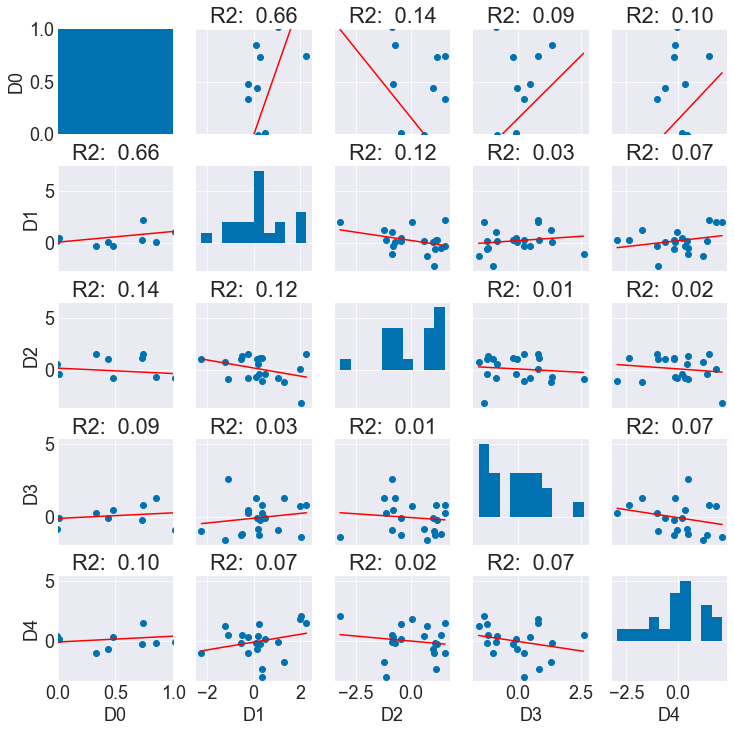

In [12]:
lin_reg.pair_plot(test52_data.get_headers())

**Question 1:** Use the test pair plot to identify potential relationships among variables. Which variables appear to be most strongly related? Which variables appear least likely to be related?

**Answer 1:** 

D1 and D0 appear to be strongly related as R2 = 0.66. D3 appears to be least likely related with any another variable as all the R2 scores are below 0.1. Moreover, the pairs (D4, D1) and (D4, D2) are weakly related. 

**Question 2:** What are the pros/cons of using pair plots to visualize multivariate data vs. a 3D scatter plot.

**Answer 2:** 

Pros: pair plots can visualize more than just 3 dimensions of data and the relationship between two variables is easier to detect with pair plots than 3D scatter plot. 

Cons: Relationships between three variables that are easy to discern in 3D scatter plot are harder to find in pair plots. For each pair plot we have to fit a regressoin line and thus it is computation-consuming. 

### 2c) Making `pair_plot` more useful

- Update your `pair_plot` code to place a histogram along the main diagonal of the `pair_plot` grid (rather than a scatter plot). The matplotlib axis clear function should be useful.


Executing the cell below should produce:
- A 5x5 grid of scatter plots (histograms along main diagonal).
- Regression lines in each scatter plot. The title of each subplot should have the $R^2$ value.
- Only 1st column has y axis labels.
- Only last column has x axis labels.

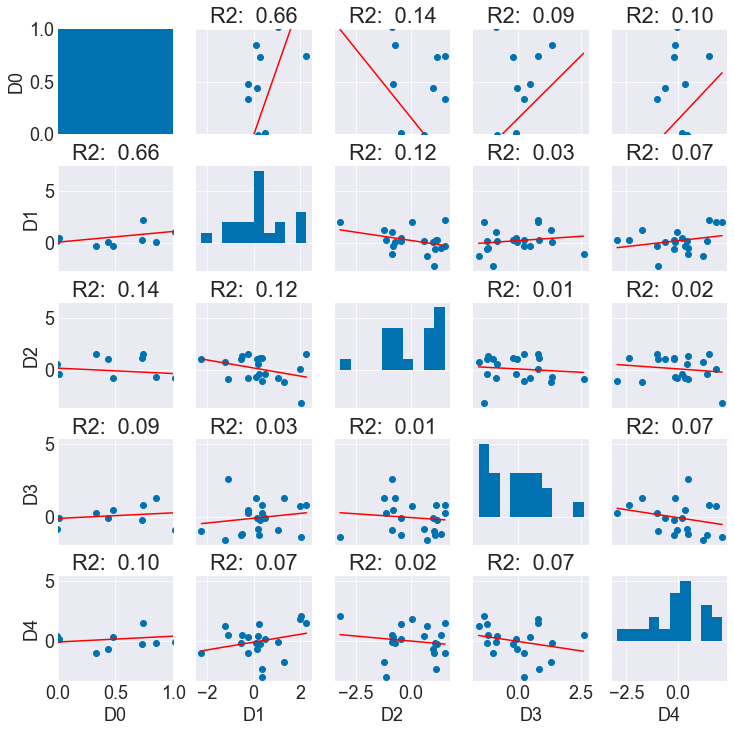

In [9]:
lin_reg.pair_plot(test52_data.get_headers())

**Question 3:** Which is more useful along diagonal, the histogram or scatterplot?

**Answer 3:**

The histogram. ALong the diagonal, we are plotting the same data in both x and y axis, which is not very helpful in terms of information revelation. Histograms, on the other hand, tell the frequencies of each data. 

## Task 3 Implement your own linear regression solver

In Tasks 1-2, you have used the SciPy least square solver to perform linear regression. In this task, you will solve the least squares problem directly using matrix math and compare the performance of the different methods on data.

- In the cell below, load in the Iris data again, make the `Data` object, create the `LinearRegression` object.

In [10]:
iris_fp = 'data/iris.csv'
iris_data = data.Data(iris_fp)
lin_reg_norm = linear_regression.LinearRegression(iris_data)

### 3a) Normal equations

This method involves solving the normal equations $$(A^TA)c = A^Ty$$

where:
- $A$ is the data matrix of independent variables selected for the regression shape=(`num_data_samps`, `num_ind_vars+1`) with an extra 1 column vector for the intercept
- $c$ is the vector of unknown regression coefficients associated with each independent variable (slopes + intercept) shape=(`num_ind_vars+1`,)
- $y$ is the dependent variable column vector shape=(`num_data_samps`,)

**TODO:**
- Implement the `linear_regression::linear_regression_normal` function. **Run test code below.**

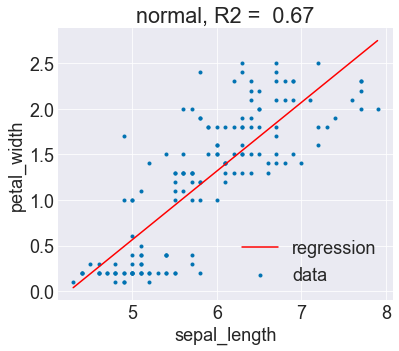

In [11]:
lin_reg_norm = linear_regression.LinearRegression(iris_data)
lin_reg_norm.linear_regression(['sepal_length'], 'petal_width', 'normal')
lin_reg_norm.scatter('sepal_length', 'petal_width', 'normal')
lin_reg_norm.show()